In [1]:
#MAPI_BOX="https://api.themoviedb.org/3/movie/550?api_key=0e2bbdb9b1fd91d87793fa8cd3aa8474"

## Loading Imports and Reading Training Data

In [62]:
import pandas as pd
import numpy as np

In [63]:
import sklearn
from sklearn.preprocessing import StandardScaler
from scipy.interpolate import *

In [64]:
from collections import Counter
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [65]:
# Loading & reading the data
from pathlib import Path

file_path = Path('./Resources/train.csv')
df = pd.read_csv(file_path, index_col="id")
df.head()

,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
id,,,,,,,,,,,,,,,,,,,,,
1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


## Cleaning Data

In [66]:
# Checking for nulls
df.isnull()

# finding number of nulls
df.isnull().sum()

# Dropping Nulls from Data
train_df = df.drop(columns = ["belongs_to_collection", "homepage", "imdb_id", "original_title", "overview", "popularity", "poster_path", "production_companies", "production_countries", "status", "tagline", "Keywords", "crew"], axis=1)
train_df.head()

,budget,genres,original_language,release_date,runtime,spoken_languages,title,cast,revenue
id,,,,,,,,,
1,14000000,"[{'id': 35, 'name': 'Comedy'}]",en,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Hot Tub Time Machine 2,"[{'cast_id': 4, 'character': 'Lou', 'credit_id...",12314651
2,40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",en,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",The Princess Diaries 2: Royal Engagement,"[{'cast_id': 1, 'character': 'Mia Thermopolis'...",95149435
3,3300000,"[{'id': 18, 'name': 'Drama'}]",en,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Whiplash,"[{'cast_id': 5, 'character': 'Andrew Neimann',...",13092000
4,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",hi,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Kahaani,"[{'cast_id': 1, 'character': 'Vidya Bagchi', '...",16000000
5,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",ko,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Marine Boy,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...",3923970


## Rearranging Data Order

In [67]:
# Rearranging the columns 
train_df = train_df.loc[:, ["title", "runtime", "budget", "release_date", "cast", "genres", "original_language", "spoken_languages", "revenue"]]
train_df.head()

,title,runtime,budget,release_date,cast,genres,original_language,spoken_languages,revenue
id,,,,,,,,,
1,Hot Tub Time Machine 2,93.0,14000000,2/20/15,"[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'id': 35, 'name': 'Comedy'}]",en,"[{'iso_639_1': 'en', 'name': 'English'}]",12314651
2,The Princess Diaries 2: Royal Engagement,113.0,40000000,8/6/04,"[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",en,"[{'iso_639_1': 'en', 'name': 'English'}]",95149435
3,Whiplash,105.0,3300000,10/10/14,"[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'id': 18, 'name': 'Drama'}]",en,"[{'iso_639_1': 'en', 'name': 'English'}]",13092000
4,Kahaani,122.0,1200000,3/9/12,"[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",hi,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",16000000
5,Marine Boy,118.0,0,2/5/09,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",ko,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",3923970


In [68]:
train_df=train_df.dropna()

## Setting Features (X) and Label (y)


In [69]:
# Using the runtime of movies to predict the revenue
X = train_df['runtime'].to_frame()
X.head()

,runtime
id,
1,93.0
2,113.0
3,105.0
4,122.0
5,118.0


In [70]:
y = train_df['revenue'].to_frame()
y.head()

,revenue
id,
1,12314651
2,95149435
3,13092000
4,16000000
5,3923970


## Training and Testing Model from Training Dataset

In [71]:
# from sklearn.datasets import make_blobs
# from sklearn.model_selection import train_test_split

# #Split into Train and Testing
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.25, random_state = 0)

# print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

## Fitting Models

In [75]:
from pandas import Series
from numpy.random import randn
N = 2962

# Independent Variables
X = train_df['runtime'] * np.random.rand(N, 1)-5
y = train_df['revenue'] * X**2 + X +2 + np.random.randn(N,1)

ValueError: Data must be 1-dimensional

In [ ]:
# plotting graph

import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(X,y)
plt.show()

In [49]:
# # Fitting Polynomial 
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4, include_bias=False)
X_poly = poly_reg.fit_transform(X)

# poly_reg.fit(X_poly, y,)

PolynomialFeatures(degree=4)

In [50]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

## Plotting Graph

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(X,y)
plt.show()

## Visuals

## Runtime vs Revenue before Prediction

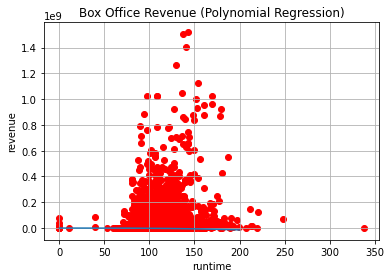

In [14]:
import matplotlib.pyplot as plt

# Visualizing 
x = train_df['runtime']
y = train_df['revenue']

x = np.linspace(0, 200, num=350)
fx = []
for i in range(len(x)):
               fx.append(x[i] **3 - 3*x[i]**3+35*x[i]**2+39*x[i]+70)

def viz_polymonial():
    plt.plot(x, fx)
    plt.grid()
    plt.scatter(X, y, color = 'red')
    plt.title('Box Office Revenue (Polynomial Regression)')
    plt.xlabel('runtime')
    plt.ylabel('revenue')
    plt.show()
              
    return
    
viz_polymonial()

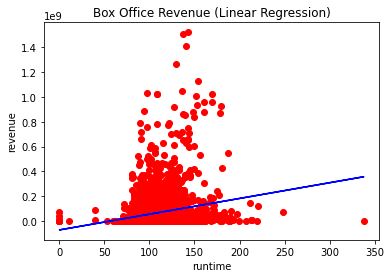

In [31]:
# Fitting to data
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

# Visualizing
def viz_linear():
    plt.scatter(X, y, color = 'red')
    plt.plot(X, lin_reg.predict(X), color = 'blue')
    plt.title('Box Office Revenue (Linear Regression)')
    plt.xlabel('runtime')
    plt.ylabel('revenue')
    plt.show()
    
    return
viz_linear()

## Setting Original Language

In [32]:
# Using the runtime of movies to predict the revenue
X = train_df['original_language'].to_frame()
X.head()

,original_language
id,
1,en
2,en
3,en
4,hi
5,ko


In [33]:
y = train_df['revenue'].to_frame()
y.head()

,revenue
id,
1,12314651
2,95149435
3,13092000
4,16000000
5,3923970


## Encoding Original Language

In [34]:
# Binary encoding the original language column as new input feature
# The label (target) revenue column is deleted from the input features

X_bin_enc = pd.get_dummies(X, columns=['original_language'])
X_bin_enc.head()

,original_language_ar,original_language_bn,original_language_cn,original_language_cs,original_language_da,original_language_de,original_language_el,original_language_en,original_language_es,original_language_fa,...,original_language_ro,original_language_ru,original_language_sr,original_language_sv,original_language_ta,original_language_te,original_language_tr,original_language_ur,original_language_vi,original_language_zh
id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


 ## Visuals

In [35]:
# The data label, to be predicted

y = train_df['revenue'].copy()

## Polymonial Regression

In [ ]:
# Creataing Poly Regression model
poly_reg = PolynomialFeatures(degree = 4)

# Fitting to the data
X_poly = poly_reg.fit_transform(X_bin_enc) 
poly_reg.fit(X_poly, y)

# Predicting Revenue by using Original language as input
predictions = model.predict(X_binary_encoded)

## Comparing Polymonial and Linear Regression 

In [ ]:
# Visualizing 
def viz_polymonial():
    plt.scatter(X, y, color = 'red')
    plt.plot
    plt.title('Box Office Revenue (Polynomial Regression)')
    plt.xlabel('original_language')
    plt.ylabel('revenue')
    plt..show()
              
    return
    
viz_polymonial()

In [ ]:
# Fitting to data
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

# Visualizing
def viz_linear():
    plt.scatter(X, y, color = 'red')
    plt.plot(X, lin_reg.predict(X), color = 'blue')
    plt.title('Box Office Revenue (Linear Regression)')
    plt.xlabel('orginal_langue')
    plt.ylabel('revenue')
    plt.show()
    
    return
viz_linear()

## Sorting 

In [ ]:
# sorting for popularity, in replacement for the wc

## 5 Features and 1 Label

In [ ]:
new_df = train_df.iloc["runtime", "budget", "release_date", "cast", "original_language"]
x = new_df["runtime", "budget", "release_date", "cast", "original_language"].values

# Training Random Forest Regression model 
rf_model = RandomForestRegressor(n_estimators=100, random_state=15)
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

In [ ]:
new_df = train_df.iloc["runtime", "budget", "release_date", "cast", "original_language"]

x = new_df["runtime", "budget", "release_date", "cast", "original_language"].values

def extract_data(train_df):
    # array to hold the label and the 5 featuress
    label = []
    features = []
    
    # iterating the rows, spliting label from features
    # converting labels to float and features into integers
    for line in file(train_df):
        row = line.split(',')
        label.append([float(x) for x in row[1:2]])
        features.append(int(row[0]))
        
    # Transforming The Data Inot vectors
    # converting float array into numpy float matrix  
    label_np = np.matrix(label).astype(np.float32)
    
    # Converting int array into numpy array
    features_np = np.array(feature).astype(dtype=np.uint8)
    
    #converting int numpy array into a one-hot matrix
    features_onehot = (np.arrange(NUM_FEATURES) == features_np[:, None]).astype(np.float32)
    
    #returning fully paired label matrix
    return label_np, features_onehot

In [ ]:
# feeding into graph
with tf.Session() as s:
    # running all intializer for the preping of trainable parameters
    tf.intitialize_all_variables().run()
    
    #Iterated and trained
    for step in xrange(num_epochs * train_size // BATCH_SIZE):
        train_step.run(feed_dict = {x: features_onehot, y_: label_np})


def main(argv=None):
    x = tf.placeholder('float', shape = [None, num_features])
    y = tf.placeholder('float', shape = [None, num_label])

In [ ]:
# Training Random Forest Regression model 
rf_model = RandomForestRegressor(n_estimators=100, random_state=15)
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

In [ ]:
# Making predictions with the training data to see how closely the model fits data when it knows the target answer
predictions = rf_model.predict(X_train_scaled)
predictions

In [ ]:
# Making predictions with the test data
y_pred = rf_model.predict(X_test_scaled)